In [1]:
%matplotlib notebook
#Import Needed Modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Read the file
df_canada = pd.read_excel('Canada.xlsx',
                         sheet_name="Canada by Citizenship",
                         skiprows=range(20),
                         skipfooter=2)

In [3]:
# Get summary of dataframe
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_canada["Total"] = df_canada[range(1980,2014)].sum(axis=1)

In [5]:
df_canada_2 = df_canada.set_index('OdName')

In [6]:
df_canada_2.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
#Filter by countries
#df_canada.OdName

In [8]:
years = list(map(str, range(1980, 2014)))

In [9]:
df_canada_2.columns = list(map(str, df_canada_2.columns)) # to prevent ambiguity between index numbers and column names

In [10]:
df_canada_2.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [11]:
df_canada_top5 = df_canada_2.head()

In [12]:
df_canada_top5 = df_canada_top5[years].transpose()

In [13]:
df_canada_top5.head()

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<IPython.core.display.Javascript object>


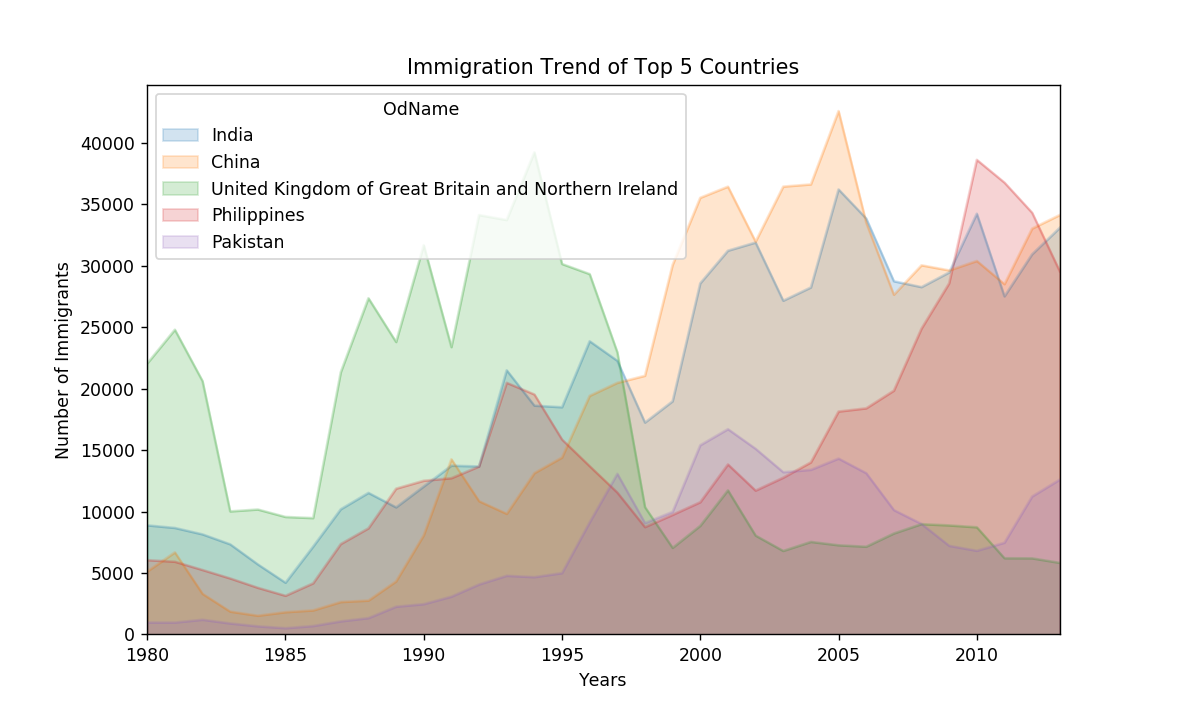

In [18]:
df_canada_top5.index = df_canada_top5.index.map(int) # integer so that graph can correctly interperet the independent variable
df_canada_top5.plot(kind='area', alpha=0.2, stacked=False, figsize=(20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()